**Gabriel Rodriguez**  


In [180]:
# Libraries used
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron

# Import a function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

In [181]:
# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("iris_dataset.csv")

In [182]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


---

Filter data: Variables *sepal length* and *petal length* for only *versicolor* and *virginica* species

In [183]:
# Filter df for output variables: versicolor and virginica species (rows 50:150)

df = df.iloc[50:150]
df

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [184]:
# Select input variables: sepal length and petal length
X = df[["sepal_length", "petal_length"]]

X

,sepal_length,petal_length
50,7.0,4.7
51,6.4,4.5
52,6.9,4.9
53,5.5,4.0
54,6.5,4.6
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [185]:
# Store the labels in an array y
y = df['species']

# We can leave the original labels and use sklearn perceptron,
# but to use mlxtend for plotting we need to encode the labels
# versicolor = -1, virginica = 1

y = np.where(y == 'versicolor', -1, 1)

y

# Using this just for the purposes of plotting

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Use Sklearn Perceptron model

In [186]:
# Instantiate one instance of the Perceptron class
clf = Perceptron()

# Fit the model to the training data
clf.fit(X, y)

Perceptron()

In [187]:
# Compute predict labels on X
y_pred = clf.predict(X)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
        1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1])

In [188]:
# Compare actual and predicted labels
print(y == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False  True  True False  True  True  True False False  True
  True False  True  True False False  True False  True False  True False
  True False  True  True False False  True False  True  True  True False
 False False  True  True]


In [189]:
clf.coef_   # weights

array([[-56.5,  74.9]])

In [190]:
clf.intercept_ # bias

array([-38.])

C:\Users\gabri\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


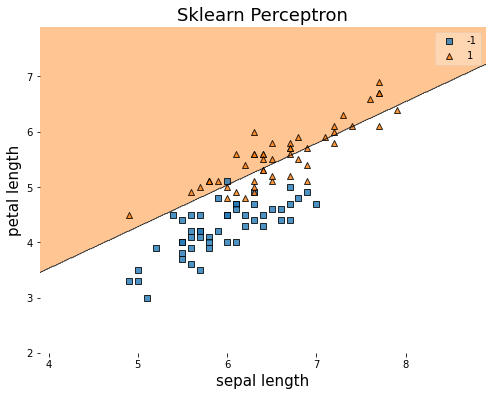

In [191]:
# Get used to using the "plot_decision_regions() func from mlxtend library"
plt.figure(figsize = (8, 6))

# X = x values, your features (to make scatterplot)
# y = labels to define classes
# clf = classifier (the decision boudary)
plot_decision_regions(X.to_numpy(), y, clf = clf) # X.to_numpy is used because the function needs to be in the form of array
plt.title("Sklearn Perceptron", fontsize = 18)
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("petal length", fontsize = 15);

**Note:** Graphing the decision region of the sklearn perceptron model reveals that versicolor and virginica species (our 2 classes) are not linearly seperable. There is an overlap of our decision boundary, having one versicolor misclassified as virginica, and a few more virginica misclassified as versicolor. We should also note that in this case, the overlap is easy to visualize due to the fact that there are only two input variables and can therefore graph it in a two dimensional space. Visualization for three input variables is also possible, but having input variables greater than three will be impossible to visualize.   

---



**Note:** Add one more variable (3 total inputs) using MyPerceptron. Need a 3rd weight. We will not be able to plot as we are using 3 dimensions. We can check our algorithm by comparing yhat to actual y values!  


In [192]:
# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("iris_dataset.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [193]:
# Filter df for output variables: setosa and versicolor species (rows 0:100)

df = df.iloc[0:100]
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [194]:
# Choosing sepal length, sepal width, and petal width as our 3 input
# variables. 

X = df[["sepal_length", "sepal_width", "petal_width"]].to_numpy()  # Convert to array for use in MyPerceptron

# By converting data to array form we can use linear algebra calculations on our data

X

array([[5.1, 3.5, 0.2],
       [4.9, 3. , 0.2],
       [4.7, 3.2, 0.2],
       [4.6, 3.1, 0.2],
       [5. , 3.6, 0.2],
       [5.4, 3.9, 0.4],
       [4.6, 3.4, 0.3],
       [5. , 3.4, 0.2],
       [4.4, 2.9, 0.2],
       [4.9, 3.1, 0.1],
       [5.4, 3.7, 0.2],
       [4.8, 3.4, 0.2],
       [4.8, 3. , 0.1],
       [4.3, 3. , 0.1],
       [5.8, 4. , 0.2],
       [5.7, 4.4, 0.4],
       [5.4, 3.9, 0.4],
       [5.1, 3.5, 0.3],
       [5.7, 3.8, 0.3],
       [5.1, 3.8, 0.3],
       [5.4, 3.4, 0.2],
       [5.1, 3.7, 0.4],
       [4.6, 3.6, 0.2],
       [5.1, 3.3, 0.5],
       [4.8, 3.4, 0.2],
       [5. , 3. , 0.2],
       [5. , 3.4, 0.4],
       [5.2, 3.5, 0.2],
       [5.2, 3.4, 0.2],
       [4.7, 3.2, 0.2],
       [4.8, 3.1, 0.2],
       [5.4, 3.4, 0.4],
       [5.2, 4.1, 0.1],
       [5.5, 4.2, 0.2],
       [4.9, 3.1, 0.1],
       [5. , 3.2, 0.2],
       [5.5, 3.5, 0.2],
       [4.9, 3.1, 0.1],
       [4.4, 3. , 0.2],
       [5.1, 3.4, 0.2],
       [5. , 3.5, 0.3],
       [4.5, 2.3

**Modify MyPerceptron to incorporate a third variable.**

In [195]:
class MyPerceptron(object):
    # These are our hyperparameters that are given and will remain constant
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def fit(self, X, y):
        self.w1 = np.random.rand(1)
        self.w2 = np.random.rand(1)
        
        ### MODIFICATION ###
        self.w3 = np.random.rand(1) # 3rd weight for 3rd variable
        
        self.b = np.random.rand(1)
        
        self.errors = []
        
        for _ in range(self.epochs):
            errors = 0
            # We are corresponding the xvalues (X) witht the appropriate output (y)
            for xi, yi in zip(X, y):
                
                update = self.eta * (self.predict(xi) - yi)
                self.w1 = self.w1 - update*xi[0] # First component of x
                self.w2 = self.w2 - update*xi[1] # Second component of x
                
                #### MODIFICATION ###
                self.w3 = self.w3 - update*xi[2] ### Third component of x
                
                self.b = self.b - update
                
                # If the update is NOT equal to zero, the datapoint has been misclassified and using the
                # int( int != 0) function will tabulate everytime that this occurs!
                errors = errors + int(update != 0)
                
            # Updating the number of errors list
            if errors == 0:
                return self
            else:
                self.errors.append(errors)
            
        return self
    
    
    def weighted_sum(self, x):
        ### MODIFICATION: Make sure to add 3rd weight for linear algebra calculations
        self.w = np.array([self.w1, self.w2, self.w3])  
        
        # Using linear algebra we are using the dot product between w and x
        return np.dot(x, self.w) + self.b
    
    def predict(self, x):
        # This is our sign() function
        return np.where(self.weighted_sum(x) > 0.0, 1, -1)

In [196]:
# Instantiate one instance of the MODIFIED My_Perceptron class
my_clf = MyPerceptron()

# Call the fit method 
my_clf.fit(X, y)

In [197]:
# Predict labels on X
y_pred = my_clf.predict(X)
y_pred

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],

In [198]:
# Reshaping array to have the same dimension of y values!
y_pred = y_pred.reshape(100)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [199]:
# Compare actual and predicted labels
print(y == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


Check the bias and weights of the modified model:

In [200]:
# Bias
print(f'Model bias: {my_clf.b}')

# Weights
print(f'Model weights: {my_clf.w}')

Model bias: [-0.48148122]
Model weights: [[ 1.50546368]
 [-4.07961563]
 [ 3.6199931 ]]


**Note:** As stated previously, we are unable to two-dimensionally graph our modified model decision boundary. Having three input variables we could potentially graph the decision bounday, in this case it would be a plane (not a line as is the case for two input variables), but it would have to be graphed three-dimensionally.  

To check the performance of our modified model we compare the predicted output (y values) with the actual values to determine if each individual classification was correct or not. Running our modified model above and making the comparison, we can see that our model is able to accurately classify each species of setosa and versicolor based on sepal width, sepal length, and petal width.  

---

### (c) Try to generalize My_Perceptron code so it could be used for any number of inputs. 
(Hint: Recall, that for a list ```w``` we can use ```w[-1]``` and ```w[:-1]``` to access the last value in the list and all the values expect the very last value. Also, use ``` np.dot```, NumPy dot product, to compute the pre-activation value of $z$.)

**Note:** Store weights in a vector! No loop needed. 



**Modify original perceptron model**

In [201]:
class MyPerceptron(object):
    # These are our hyperparameters that are given and will remain constant
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def fit(self, X, y):
        ### MODIFICATION ###
        ## Create vectors to store weights and biases ##
        
        # The size of weight vector must be number of variables 
        self.w = np.random.rand(X.shape[1])  #X.shape[1] to obtain number of col/variables 
        
        # The size of bias vector should equal the number of desired output
        self.b = np.random.rand(X.shape[1])
        
        # Iniate empty list to keep track of error value
        self.errors = []
        
        for _ in range(self.epochs):
            errors = 0
            # We are corresponding the xvalues (X) with the appropriate output (y)
            for xi, yi in zip(X, y):
                
                # Use self.predict method and chosen eta to calculate updated value
                update = self.eta * (self.predict(xi) - yi)
                
                # choosing all of the features 
                self.w[0:] = self.w[0:] - update*xi 
                # Update the bias
                self.b = self.b - update
                
                # If the update is NOT equal to zero, the datapoint has been misclassified and using the
                # int( int != 0) function will tabulate everytime that this occurs!
                errors = errors + int(update != 0)
                
            # Updating the number of errors list
            if errors == 0:
                return self
            else:
                self.errors.append(errors)
            
        return self
    
    
    def weighted_sum(self, x):
        
        # Using linear algebra we are using the dot product between w and x
        return np.dot(x, self.w[0:]) + self.b[0]
    
    def predict(self, x):
        # This is our sign() function
        # Assigns either 1 or -1 value based on whether weighted sum is positive or negative
        return np.where(self.weighted_sum(x) > 0.0, 1, -1)

--- 

**Use the generalized model to classify setosa and versicolor by using 2 and 4 variables**

In [202]:
# We need only setosa and versicolor which are the first 100 rows

df = df.iloc[:100]

# Store the labels in y
y = df['species']

# We can leave the original labels and use sklearn perceptron,
# but to use mlxtend for plotting we need to encode the labels
# setosa = -1, versicolor = 1

y = np.where(y == 'setosa', -1, 1)



**Using 2 variables**  

To test our generalized My_Perceptron class we will use sepal length and petal length to classify setosa and versicolor. We will use this example as we know it is linearly seperable. 

In [203]:
# Choosing all 4 variables

X = df[["sepal_length", "petal_length"]].to_numpy()  # Convert to array for use in MyPerceptron

# By converting data to array form we can use linear algebra calculations on our data


# Instantiate one instance of the MODIFIED My_Perceptron class
my_clf = MyPerceptron()

# Call the fit method 
my_clf.fit(X, y)

# Predict labels on X
y_pred = my_clf.predict(X)


# Compare actual and predicted labels
print(y == y_pred.reshape(100))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [204]:
# Instantiate one instance of the MODIFIED My_Perceptron class
my_clf = MyPerceptron()

# Call the fit method 
my_clf.fit(X, y)

In [205]:
# Predict labels on X
y_pred = my_clf.predict(X)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [206]:
# Reshaping array to have the same dimension of y values!
y_pred = y_pred.reshape(100)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [207]:
# Compare actual and predicted labels
print(y == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


--- 
**Using the previous 3 variables**

In [208]:
# Choosing all 4 variables

X = df[["sepal_length", "sepal_width", "petal_width"]].to_numpy()  # Convert to array for use in MyPerceptron

# By converting data to array form we can use linear algebra calculations on our data


# Instantiate one instance of the MODIFIED My_Perceptron class
my_clf = MyPerceptron()

# Call the fit method 
my_clf.fit(X, y)

# Predict labels on X
y_pred = my_clf.predict(X)


# Compare actual and predicted labels
print(y == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


---

**Using 4 variables**

In [209]:
# Choosing all 4 variables

X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].to_numpy()  # Convert to array for use in MyPerceptron

# By converting data to array form we can use linear algebra calculations on our data


# Instantiate one instance of the MODIFIED My_Perceptron class
my_clf = MyPerceptron()

# Call the fit method 
my_clf.fit(X, y)

# Predict labels on X
y_pred = my_clf.predict(X)


# Compare actual and predicted labels
print(y == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


**Note:** Our generalized perceptron model is accurately classifying setosa and versicolor species using 2, 3, and 4 features.